step : 0
cost : 44775.4375
prediction : [[-120.75349426]
 [-104.595047  ]
 [  -6.04529905]]
step : 100
cost : 455.218719482
prediction : [[ 131.60844421]
 [  97.05429077]
 [ 152.06152344]]
step : 200
cost : 270.852935791
prediction : [[ 136.02307129]
 [ 106.50684357]
 [ 141.97270203]]
step : 300
cost : 194.583007812
prediction : [[ 134.43475342]
 [ 110.63368225]
 [ 140.57676697]]
step : 400
cost : 140.506149292
prediction : [[ 132.3755188 ]
 [ 113.62176514]
 [ 140.34403992]]
step : 500
cost : 101.470787048
prediction : [[ 130.53132629]
 [ 116.09212494]
 [ 140.27296448]]
step : 600
cost : 73.2801971436
prediction : [[ 128.9515686 ]
 [ 118.18232727]
 [ 140.22940063]]
step : 700
cost : 52.921661377
prediction : [[ 127.60740662]
 [ 119.95736694]
 [ 140.19459534]]
step : 800
cost : 38.2190628052
prediction : [[ 126.46489716]
 [ 121.4656601 ]
 [ 140.16532898]]
step : 900
cost : 27.6010494232
prediction : [[ 125.49394226]
 [ 122.74741364]
 [ 140.14048767]]
step : 1000
cost : 19.9329662323
pre

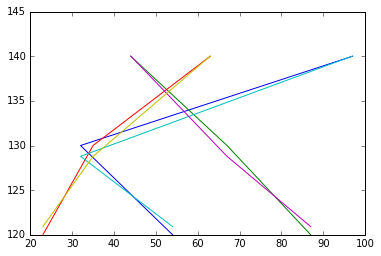

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt

hypo_list = []
w_list = []
x_data = [[54., 87., 23.], [32., 67., 35.], [97., 44., 63.]]
y_data = [[120.], [130.], [140.]]

X = tf.placeholder(tf.float32, shape = [None, 3] )
Y = tf.placeholder(tf.float32, shape = [None, 1] )

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name ='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00001)

train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.initialize_all_variables())

for step in range(0, 2001):
    ret_cost, ret_hy, ret_W, ret_b, _ = sess.run([cost, hypothesis, W, b, train], feed_dict={X : x_data, Y : y_data})
    hypo_list.append(ret_hy)
    w_list.append(ret_W)
    if(step % 100 == 0):
        print("step : {}\ncost : {}\nprediction : {}\n=======================".format(step, ret_cost, ret_hy))

plt.plot(x_data, y_data)
plt.plot(x_data, ret_hy)
plt.show()